<a href="https://colab.research.google.com/github/nishi1612/CS302-Modelling-and-Simulation/blob/master/SARS_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import math
import matplotlib.pyplot as plt
import numpy as np

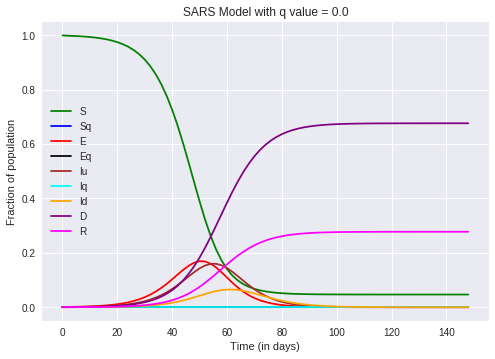

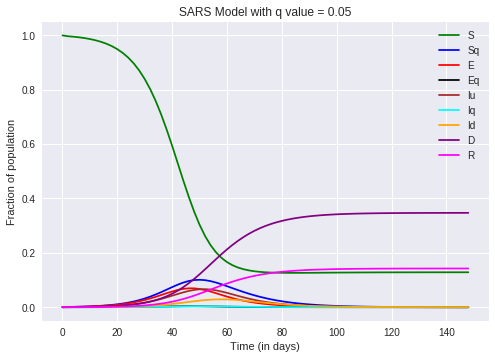

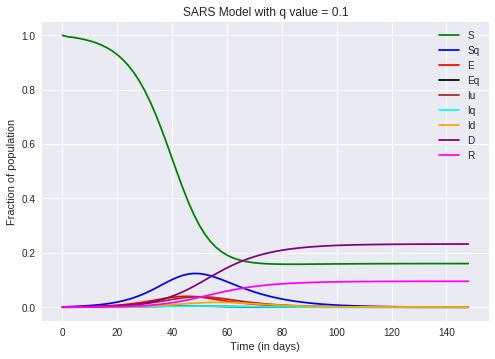

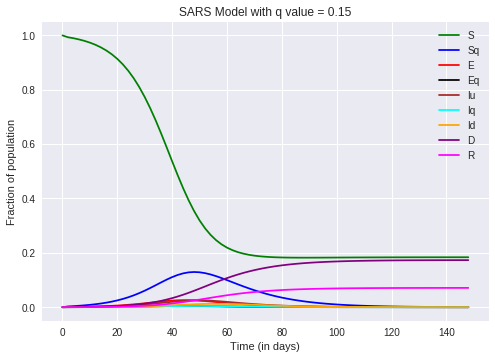

In [0]:
b = 0.06 
k = 10 
m = 0.0975
N = 1e7
p = 0.2
u = 0.1
v = 0.04
w = 0.0625

def s(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return u*Sq - k*q*(1-b)*Iu*S/N - k*q*Iu*S/N - k*(1-q)*b*Iu*S/N

def sq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return k*q*(1-b)*Iu*S/N - u*Sq

def e(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return k*(1-q)*b*Iu*S/N - p*E

def eq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return k*q*b*Iu*S/N - p*Eq

def iu(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return p*E - m*Iu - v*Iu - w*Iu

def iq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return p*Eq - m*Iq - v*Iq - w*Iq

def ids(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return w*Iu + w*Iq - v*Id - m*Id

def d(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return m*(Iu + Iq + Id)

def r(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return v*(Iu + Iq + Id)

q_values = np.arange(0,0.2,0.05)

for q in q_values:

  start_time = 0
  end_time = 150
  dt = 2
  
  n = int((end_time - start_time) / dt )
  
  S = np.zeros(n)
  Sq = np.zeros(n)
  E = np.zeros(n)

  Eq = np.zeros(n)
  Iu = np.zeros(n)
  Id = np.zeros(n)

  R = np.zeros(n)
  D = np.zeros(n)
  Iq = np.zeros(n)

  S[0] = N - 1e4
  Iu[0] = 1e4

  for i in range(1,len(S)):
    S[i] = S[i-1] + s(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Sq[i] = Sq[i-1] + sq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    E[i] = E[i-1] + e(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Eq[i] = Eq[i-1] + eq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Iu[i] = Iu[i-1] + iu(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Id[i] = Id[i-1] + ids(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Iq[i] = Iq[i-1] + iq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    D[i] = D[i-1] + d(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    R[i] = R[i-1] + r(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  plt.plot(np.arange(start_time,end_time,dt),S/N,label='S',color='green')
  plt.plot(np.arange(start_time,end_time,dt),Sq/N,label='Sq',color='blue')
  plt.plot(np.arange(start_time,end_time,dt),E/N,label='E',color='red')
  plt.plot(np.arange(start_time,end_time,dt),Eq/N,label='Eq',color='black')
  plt.plot(np.arange(start_time,end_time,dt),Iu/N,label='Iu',color='brown')
  plt.plot(np.arange(start_time,end_time,dt),Iq/N,label='Iq',color='cyan')
  plt.plot(np.arange(start_time,end_time,dt),Id/N,label='Id',color='orange')
  plt.plot(np.arange(start_time,end_time,dt),D/N,label='D',color='purple')
  plt.plot(np.arange(start_time,end_time,dt),R/N,label='R',color='magenta')
  plt.legend()
  plt.xlabel('Time (in days)')
  plt.ylabel('Fraction of population')
  plt.title('SARS Model with q value = ' + str(round(q,2)))
  plt.show()

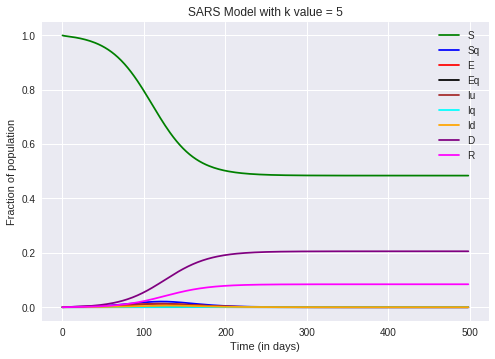

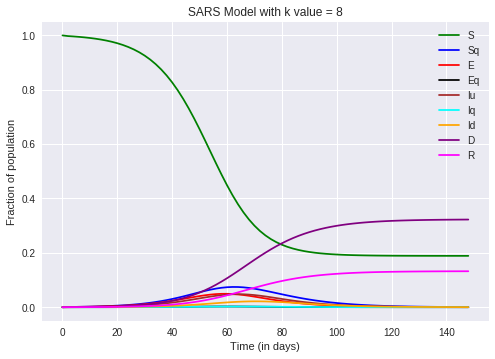

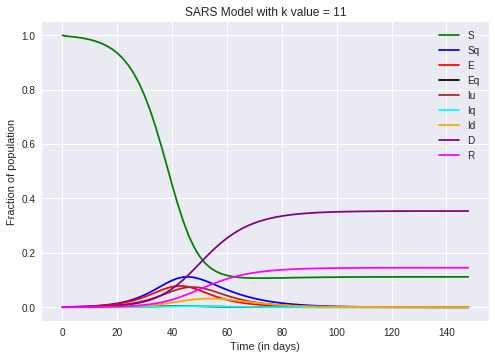

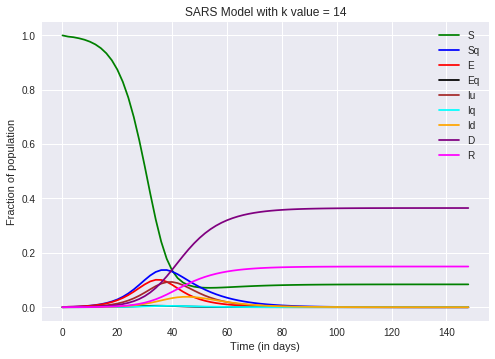

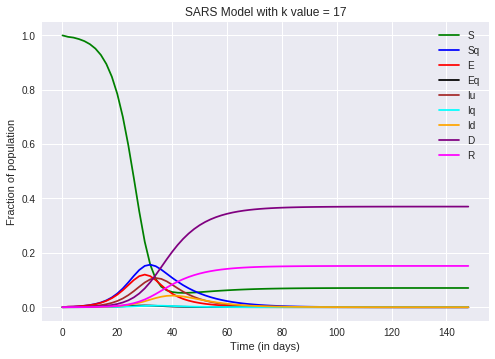

In [0]:
b = 0.06 
q = 0.05
m = 0.0975
N = 1e7
p = 0.2
u = 0.1
v = 0.04
w = 0.0625

def s(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return u*Sq - k*q*(1-b)*Iu*S/N - k*q*Iu*S/N - k*(1-q)*b*Iu*S/N

def sq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return k*q*(1-b)*Iu*S/N - u*Sq

def e(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return k*(1-q)*b*Iu*S/N - p*E

def eq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return k*q*b*Iu*S/N - p*Eq

def iu(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return p*E - m*Iu - v*Iu - w*Iu

def iq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return p*Eq - m*Iq - v*Iq - w*Iq

def ids(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return w*Iu + w*Iq - v*Id - m*Id

def d(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return m*(Iu + Iq + Id)

def r(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return v*(Iu + Iq + Id)

k_values = np.arange(5,20,3)

for k in k_values:

  start_time = 0
  end_time = 150
  if(k==5):
    end_time = 500
  dt = 2

  n = int((end_time - start_time) / dt )
  
  S = np.zeros(n)
  Sq = np.zeros(n)
  E = np.zeros(n)

  Eq = np.zeros(n)
  Iu = np.zeros(n)
  Id = np.zeros(n)

  R = np.zeros(n)
  D = np.zeros(n)
  Iq = np.zeros(n)

  S[0] = N - 1e4
  Iu[0] = 1e4

  for i in range(1,len(S)):
    S[i] = S[i-1] + s(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Sq[i] = Sq[i-1] + sq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    E[i] = E[i-1] + e(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Eq[i] = Eq[i-1] + eq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Iu[i] = Iu[i-1] + iu(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Id[i] = Id[i-1] + ids(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Iq[i] = Iq[i-1] + iq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    D[i] = D[i-1] + d(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    R[i] = R[i-1] + r(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  plt.plot(np.arange(start_time,end_time,dt),S/N,label='S',color='green')
  plt.plot(np.arange(start_time,end_time,dt),Sq/N,label='Sq',color='blue')
  plt.plot(np.arange(start_time,end_time,dt),E/N,label='E',color='red')
  plt.plot(np.arange(start_time,end_time,dt),Eq/N,label='Eq',color='black')
  plt.plot(np.arange(start_time,end_time,dt),Iu/N,label='Iu',color='brown')
  plt.plot(np.arange(start_time,end_time,dt),Iq/N,label='Iq',color='cyan')
  plt.plot(np.arange(start_time,end_time,dt),Id/N,label='Id',color='orange')
  plt.plot(np.arange(start_time,end_time,dt),D/N,label='D',color='purple')
  plt.plot(np.arange(start_time,end_time,dt),R/N,label='R',color='magenta')
  plt.legend()
  plt.xlabel('Time (in days)')
  plt.ylabel('Fraction of population')
  plt.title('SARS Model with k value = ' + str(round(k,2)))
  plt.show()

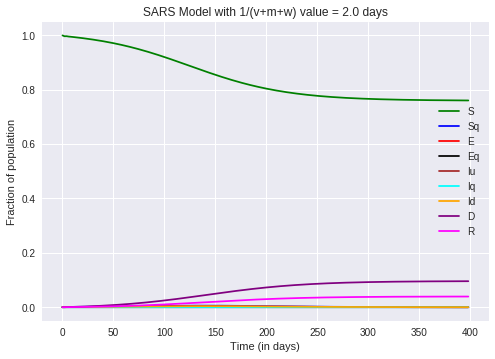

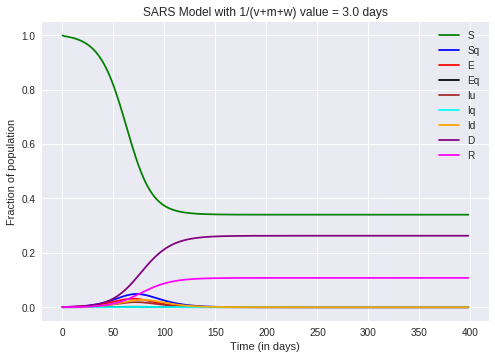

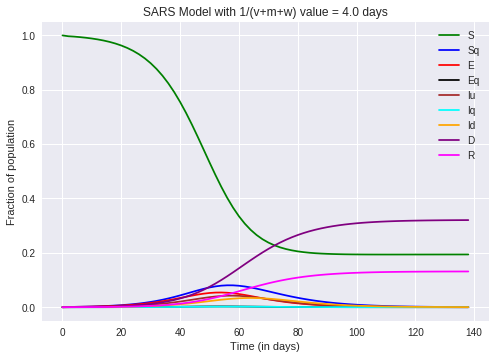

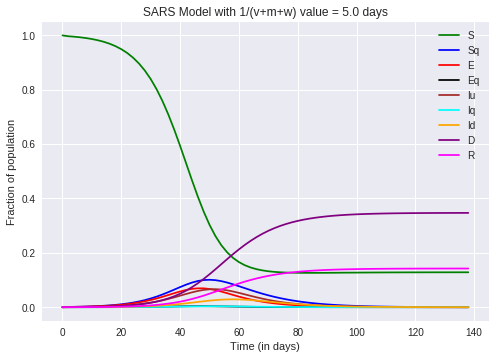

In [0]:
b = 0.06 
q = 0.05
m = 0.0975
N = 1e7
p = 0.2
u = 0.1
k = 10
w = 0.0625

def s(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return u*Sq - k*q*(1-b)*Iu*S/N - k*q*Iu*S/N - k*(1-q)*b*Iu*S/N

def sq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return k*q*(1-b)*Iu*S/N - u*Sq

def e(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return k*(1-q)*b*Iu*S/N - p*E

def eq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return k*q*b*Iu*S/N - p*Eq

def iu(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return p*E - m*Iu - v*Iu - w*Iu

def iq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return p*Eq - m*Iq - v*Iq - w*Iq

def ids(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return w*Iu + w*Iq - v*Id - m*Id

def d(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return m*(Iu + Iq + Id)

def r(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return v*(Iu + Iq + Id)

v = 0.04
total = np.arange(2,6,1)

w_values = [(1/x - v - m) for x in total]

for w in w_values:

  start_time = 0
  if (1/(v+w+m) < 3):
    end_time = 400
  else:
    end_time = 140  
  dt = 2

  n = int((end_time - start_time) / dt )
  
  S = np.zeros(n)
  Sq = np.zeros(n)
  E = np.zeros(n)

  Eq = np.zeros(n)
  Iu = np.zeros(n)
  Id = np.zeros(n)

  R = np.zeros(n)
  D = np.zeros(n)
  Iq = np.zeros(n)

  S[0] = N - 1e4
  Iu[0] = 1e4

  for i in range(1,len(S)):
    S[i] = S[i-1] + s(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Sq[i] = Sq[i-1] + sq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    E[i] = E[i-1] + e(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Eq[i] = Eq[i-1] + eq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Iu[i] = Iu[i-1] + iu(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Id[i] = Id[i-1] + ids(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Iq[i] = Iq[i-1] + iq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    D[i] = D[i-1] + d(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    R[i] = R[i-1] + r(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  plt.plot(np.arange(start_time,end_time,dt),S/N,label='S',color='green')
  plt.plot(np.arange(start_time,end_time,dt),Sq/N,label='Sq',color='blue')
  plt.plot(np.arange(start_time,end_time,dt),E/N,label='E',color='red')
  plt.plot(np.arange(start_time,end_time,dt),Eq/N,label='Eq',color='black')
  plt.plot(np.arange(start_time,end_time,dt),Iu/N,label='Iu',color='brown')
  plt.plot(np.arange(start_time,end_time,dt),Iq/N,label='Iq',color='cyan')
  plt.plot(np.arange(start_time,end_time,dt),Id/N,label='Id',color='orange')
  plt.plot(np.arange(start_time,end_time,dt),D/N,label='D',color='purple')
  plt.plot(np.arange(start_time,end_time,dt),R/N,label='R',color='magenta')
  plt.legend()
  plt.xlabel('Time (in days)')
  plt.ylabel('Fraction of population')
  plt.title('SARS Model with 1/(v+m+w) value = ' + str(round(1/(v+w+m),2)) + ' days')
  plt.show()

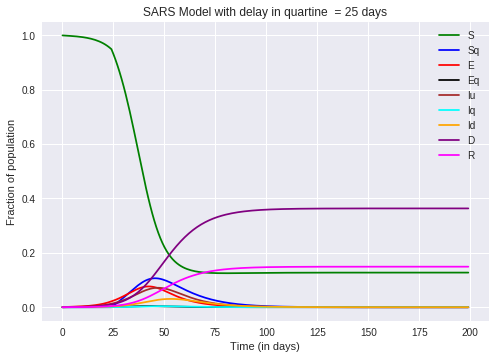

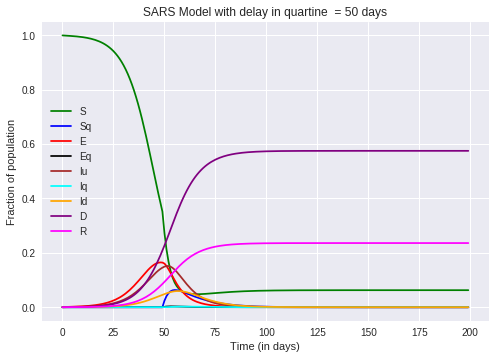

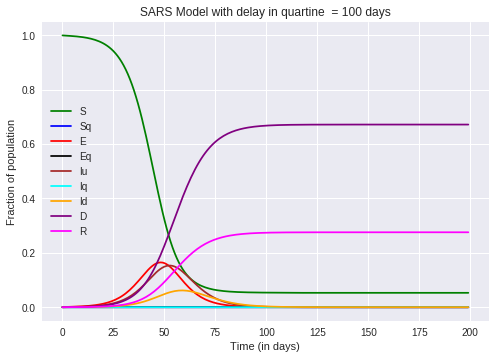

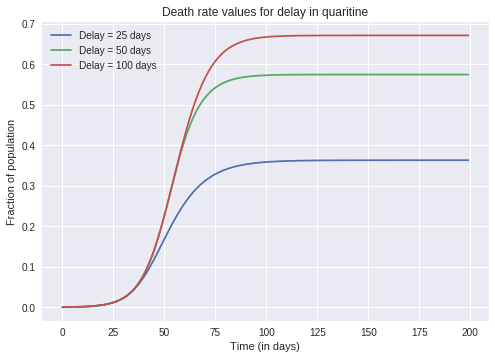

In [0]:
b = 0.06 
k = 10 
m = 0.0975
N = 1e7
p = 0.2
u = 0.1
v = 0.04
w = 0.0625

def s(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return u*Sq - k*q*(1-b)*Iu*S/N - k*q*Iu*S/N - k*(1-q)*b*Iu*S/N

def sq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return k*q*(1-b)*Iu*S/N - u*Sq

def e(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return k*(1-q)*b*Iu*S/N - p*E

def eq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return k*q*b*Iu*S/N - p*Eq

def iu(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return p*E - m*Iu - v*Iu - w*Iu

def iq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return p*Eq - m*Iq - v*Iq - w*Iq

def ids(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return w*Iu + w*Iq - v*Id - m*Id

def d(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return m*(Iu + Iq + Id)

def r(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return v*(Iu + Iq + Id)

days_values = [25,50,100]
q_value = 0.05

death_values = []

for da in days_values:

  start_time = 0
  end_time = 200
  dt = 1

  n = int((end_time - start_time) / dt )
  
  S = np.zeros(n)
  Sq = np.zeros(n)
  E = np.zeros(n)

  Eq = np.zeros(n)
  Iu = np.zeros(n)
  Id = np.zeros(n)

  R = np.zeros(n)
  D = np.zeros(n)
  Iq = np.zeros(n)

  S[0] = N - 1e4
  Iu[0] = 1e4

  for i in range(1,len(S)):
    if(i<da):
      q=0
    else:
      q=q_value
    S[i] = S[i-1] + s(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Sq[i] = Sq[i-1] + sq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    E[i] = E[i-1] + e(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Eq[i] = Eq[i-1] + eq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Iu[i] = Iu[i-1] + iu(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Id[i] = Id[i-1] + ids(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Iq[i] = Iq[i-1] + iq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    D[i] = D[i-1] + d(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    R[i] = R[i-1] + r(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  death_values.append(D)
  plt.plot(np.arange(start_time,end_time,dt),S/N,label='S',color='green')
  plt.plot(np.arange(start_time,end_time,dt),Sq/N,label='Sq',color='blue')
  plt.plot(np.arange(start_time,end_time,dt),E/N,label='E',color='red')
  plt.plot(np.arange(start_time,end_time,dt),Eq/N,label='Eq',color='black')
  plt.plot(np.arange(start_time,end_time,dt),Iu/N,label='Iu',color='brown')
  plt.plot(np.arange(start_time,end_time,dt),Iq/N,label='Iq',color='cyan')
  plt.plot(np.arange(start_time,end_time,dt),Id/N,label='Id',color='orange')
  plt.plot(np.arange(start_time,end_time,dt),D/N,label='D',color='purple')
  plt.plot(np.arange(start_time,end_time,dt),R/N,label='R',color='magenta')
  plt.legend()
  plt.xlabel('Time (in days)')
  plt.ylabel('Fraction of population')
  plt.title('SARS Model with delay in quartine  = ' + str(round(da,2)) + ' days')
  plt.show()
  
for i in range(len(death_values)):
  plt.plot(death_values[i]/N,label = 'Delay = ' + str(days_values[i]) + ' days')
plt.xlabel('Time (in days)')
plt.ylabel('Fraction of population')
plt.title('Death rate values for delay in quaritine')
plt.legend()
plt.show()